<a href="https://colab.research.google.com/github/sahana-github/Machine-learning-Demo/blob/main/Building_Linear_Regression_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
#importing numpy library
import numpy as np


**Linear** **Regression**

In [21]:
class Linear_Regression():

#initiating the parameters(learning_rate and no_of iterations)
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations


  def fit(self,X,Y):
    #number of training examples and features
    self.m,self.n=X.shape#number of rows and columns
    #initiating weights and bias
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    #implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()


  def update_weights(self,):
    Y_prediction=self.predict(self.X)

    #calculate gradients
    dw=-(2*(self.X.T).dot(self.Y-Y_prediction))/self.m
    db=-2*np.sum(self.Y-Y_prediction)/self.m

    #updating the weights
    self.w=self.w-self.learning_rate*dw
    self.b=self.b-self.learning_rate*db

  def predict(self,X):

    return X.dot(self.w)+self.b



In [2]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

Using Linear_Regression model for prediction


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


Data Preprocessing

In [2]:
salary_data=pd.read_csv('/content/salary_data.csv')


In [3]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [4]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [5]:
salary_data.shape

(30, 2)

In [7]:
#check missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

Spliting Features and Target

In [15]:
X=salary_data.iloc[:,:-1].values
Y=salary_data.iloc[:,1].values

In [16]:
print(X)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]


In [17]:
print(Y)

[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


Spliting dataset into training and test data

In [18]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

In [22]:
model=Linear_Regression(learning_rate=0.02,no_of_iterations=1000)

In [23]:
model.fit(X_train,Y_train)

In [25]:
#printing parameter values(weights and bias)
print('weight = ',model.w[0])
print('bias = ',model.b)

weight =  9514.400999035135
bias =  23697.406507136307


predict the salary value for test data

In [27]:
test_data_prediction=model.predict(X_test)

In [28]:
print(test_data_prediction)

[ 36066.12780588  34163.24760607  66512.21100279  58900.69020357
  91249.65360029  80783.81250135 101715.49469922  52240.60950424
  42726.20850521  88395.33330058]


Visualising Predicted and actual values


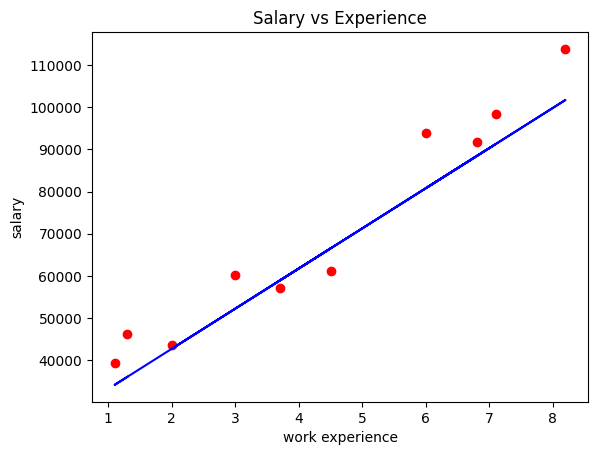

In [32]:
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('work experience')
plt.ylabel('salary')
plt.title('Salary vs Experience')
plt.show()